In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import warnings; warnings.simplefilter('ignore')

df=pd.read_csv("c19new.csv")

df.head()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Cured', 'Confirmed Cases']] =scaler.fit_transform(df[['Cured', 'Confirmed Cases']])  
df.tail()

,Date,Cured,Deaths,Confirmed Cases
267,23-10-2020,2.679081,117306,2.475919
268,24-10-2020,2.711539,117956,2.497821
269,25-10-2020,2.741368,118534,2.518393
270,26-10-2020,2.769769,119014,2.536921
271,27-10-2020,2.800446,119502,2.551888


In [3]:
X = df[['Confirmed Cases','Cured']]

In [4]:
y = df['Deaths']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)

In [8]:
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [9]:
y_pred = regressor.predict(X_test)


In [10]:
from sklearn import metrics

In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 263.6213235294116


In [12]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 215478.04341911752


In [13]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 464.1961260276926


In [14]:
reg=regressor

print('Random Forest Regression: R^2 score on test set', reg.score(X_test, y_test)*100)

Random Forest Regression: R^2 score on test set 99.98312777598544


In [15]:
s=[]
for i in range (1,273):
    s.append(i)
df['noofdays']=s
df.head()

,Date,Cured,Deaths,Confirmed Cases,noofdays
0,30-01-2020,-0.659782,0,-0.709159,1
1,31-01-2020,-0.659782,0,-0.709159,2
2,1/2/2020,-0.659782,0,-0.709159,3
3,2/2/2020,-0.659782,0,-0.709159,4
4,3/2/2020,-0.659782,0,-0.709159,5


In [17]:
y_hats2 = regressor.predict(X)

df['predicted'] = y_hats2
df.tail()

,Date,Cured,Deaths,Confirmed Cases,noofdays,predicted
267,23-10-2020,2.679081,117306,2.475919,268,117399.5
268,24-10-2020,2.711539,117956,2.497821,269,117943.2
269,25-10-2020,2.741368,118534,2.518393,270,118592.1
270,26-10-2020,2.769769,119014,2.536921,271,119034.7
271,27-10-2020,2.800446,119502,2.551888,272,119253.9


In [18]:
z=y_train.append(y_test)
z.shape

(272,)

In [19]:
df.iloc[1:6, 2:3]

,Deaths
1,0
2,0
3,0
4,0
5,0


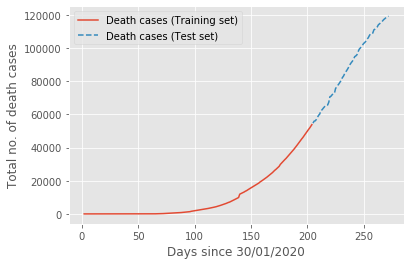

In [20]:
x1 = df.iloc[1:204,4:5]
y_1 = df.iloc[1:204,2:3]
x = df.iloc[204:272,4:5]
y_2 = df.iloc[204:272,5:6]
fig, ax = plt.subplots()

ax.plot(x1, y_1, label='Death cases (Training set)')
ax.plot(x, y_2,linestyle='dashed', label='Death cases (Test set)')
ax.set_xlabel('Days since 30/01/2020')
ax.set_ylabel('Total no. of death cases')
leg = ax.legend();



<h3>Evaluation Metrics using Random Forest Regression</h3><br> 
<p>Mean Absolute Error: 263.6213235294116 <br> 
Mean Squared Error: 215478.04341911752 <br>
Root Mean Squared Error: 464.1961260276926 <br>
R^2 score on test set: 99.98312777598544</p>